In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 붓꽃 데이터

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
y = df.iloc[0:100,4].values
print(y[-5:])

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']


In [8]:
y = np.where(y== 'Iris-setosa', -1, 1)
print(y[-5:])

[1 1 1 1 1]


In [9]:
X = df.iloc[0:100,[0,2]].values

### 산점도

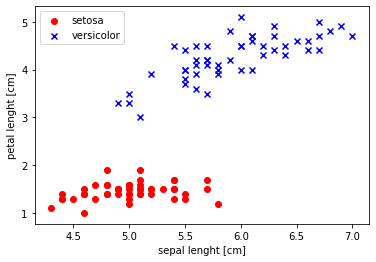

In [12]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

## 퍼셉트론 구현

In [16]:
class Perceptron(object):
    def __init__(self, learning_rate = 0.01, epochs = 50, random_state= 1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state #시드값
        
    def fit(self, X,y):
        # 처음에는 가중치를 랜덤한 값으로 초기화
        self.w_ = np.random.RandomState(self.random_state).normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
        
        self.errors_ = [] # 학습하면서 에러를 리스트에 넣음
        
        for _ in range(self.epochs):
            errors = 0 
            for xi, target in zip(X,y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[0] += update #feature 벡터에서 첫번째 feature는 1로 둠 (퍼셉트론 이론 글 참고)
                self.w_[1:] += update * xi 
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X):
        #결정 함수 들어가기전 최종 입력 계산 
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        
        result = np.where(z >= 0.0, 1,-1)
        
        return result
    

## 훈련

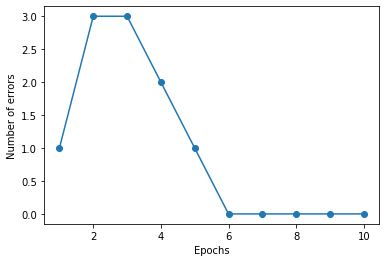

In [19]:
ppn = Perceptron(learning_rate=0.1, epochs=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1),ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

### 결정 경계 그래프

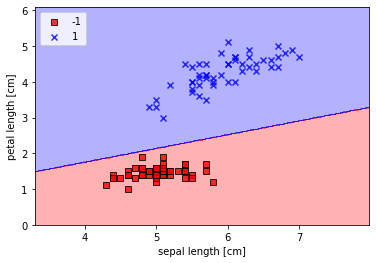

In [21]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

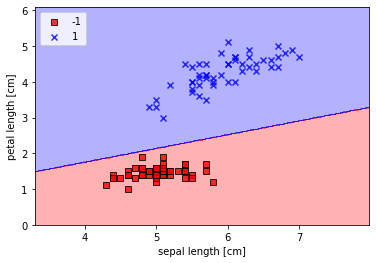

In [24]:

# 마커와 컬러맵을 설정
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계를 그림
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max,0.02))
Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# 샘플의 산점도를 그림
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
                y=X[y == cl, 1],
                alpha=0.8, 
                c=colors[idx],
                marker=markers[idx], 
                label=cl, 
                edgecolor='black')
        
        
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()